In [176]:
import pandas as pd

df=pd.read_csv("C:/Min/개인공부/BDA 6기/데이터/NH거래고객데이터.csv")

# 기업이라면?
이탈할 고객, 이탈하지 않을 고객, 이탈할 가능성이 크거나 작은 고객 등등 고객의 이탈에 대해 분류하고 싶을 것이다. 

->  kmeans를 통해 이탈 고객을 clustering 해보자!

# 가설 세우기
1. 투자성향이 공격적일수록 금방 이탈할 것이다
2. 고객등급이 높을수록 이탈이 적을 것이다.
3. 나이가 많을수록 자산이 많고, 이탈이 적을 것이다.
4. 투자기간이 짧을수록 이탈 가능성이 높을 것이다.

In [177]:
df

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [178]:
df.info()
#결측치 없는 수치형 데이터들이구나

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   계좌          10000 non-null  object
 2   성별          10000 non-null  int64 
 3   연령구간        10000 non-null  int64 
 4   투자성향        10000 non-null  int64 
 5   고객자산구간      10000 non-null  int64 
 6   주거래상품군      10000 non-null  int64 
 7   LIFESTAGE   10000 non-null  int64 
 8   고객등급        10000 non-null  int64 
 9   총투자기간       10000 non-null  int64 
 10  주거래업종구분     10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [179]:
df.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [180]:
plt.rcParams['font.family'] = 'NanumGothic'

In [181]:
#전체데이터의 분포 확인 위해 모든 컬럼의 무의미한 값 제거
df=df[(df['투자성향']!=99)&(df['주거래상품군']!=99)&(df['고객등급']!=99)&(df['고객등급']!=9)]

<AxesSubplot:xlabel='연령구간', ylabel='count'>

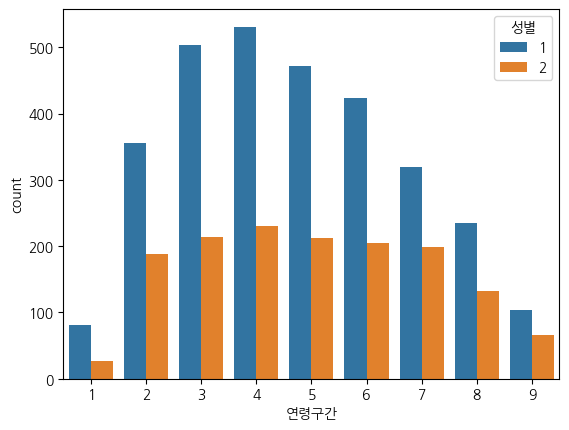

In [150]:
#연령구간별 성별 크기
import seaborn as sns
sns.countplot(x='연령구간',data= df, hue='성별')

#모든 구간에서 1이 더 많음
#1은 3-4구간에서 가장 많고 2는 2-7 구간에서 퍼져있음

In [114]:
#연령구간별 성별의 비율
for i in df.연령구간.unique():
    print(df[df.연령구간==i].groupby(['연령구간','성별'])['투자성향'].count()/df[df.연령구간==i].shape[0])
#모든 구간에서 성별 1이 60%이상 차지
#연령이 높아질수록 차지비율 떨어짐 (75% -> 60%)

연령구간  성별
6     1     0.673567
      2     0.326433
Name: 투자성향, dtype: float64
연령구간  성별
7     1     0.617021
      2     0.382979
Name: 투자성향, dtype: float64
연령구간  성별
5     1     0.689605
      2     0.310395
Name: 투자성향, dtype: float64
연령구간  성별
4     1     0.697766
      2     0.302234
Name: 투자성향, dtype: float64
연령구간  성별
8     1     0.640327
      2     0.359673
Name: 투자성향, dtype: float64
연령구간  성별
9     1     0.609467
      2     0.390533
Name: 투자성향, dtype: float64
연령구간  성별
2     1     0.653775
      2     0.346225
Name: 투자성향, dtype: float64
연령구간  성별
3     1     0.70195
      2     0.29805
Name: 투자성향, dtype: float64
연령구간  성별
1     1     0.75
      2     0.25
Name: 투자성향, dtype: float64


<AxesSubplot:xlabel='연령구간', ylabel='count'>

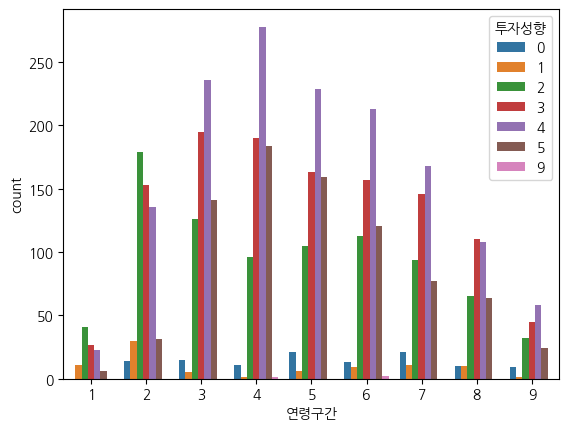

In [151]:
sns.countplot(x='연령구간',data= df, hue='투자성향')

In [152]:
for i in df.연령구간.unique():
    print(df[df.연령구간==i].groupby(['연령구간','투자성향'])['성별'].count()/df[df.연령구간==i].shape[0])
    
#연령구간 1 : 안전 ~ 위험중립
#연령구간 2 : 1과 비슷
#연령구간 3 : 위험중립 ~ 적극투자 (시드머니가 많아서 그런걸까)
#연령구간 4 : 3과 비슷
#연령구간 5 : 안전~적극투자 (적극투자 비율 더 커짐)
#연령구간 6 : 3와 비슷 (다시 꺾임)
#연령구간 7 : 6보다 위험투자 줄고 위험중립 늘음
#연령구간 8 : 7과 비율 비슷함
#연령구간 9 : 7과 비슷함

#결론 : 연령구간 1,2까진 안정적이다가 3-5구간에서 급격히 공격,적극투자형이 많아짐. 그러다 6-9에서 갑자기 공격/적극형 비율 크게 줄어듦

연령구간  투자성향
6     0       0.020701
      1       0.014331
      2       0.179936
      3       0.250000
      4       0.339172
      5       0.192675
      9       0.003185
Name: 성별, dtype: float64
연령구간  투자성향
7     0       0.040619
      1       0.021277
      2       0.181818
      3       0.282398
      4       0.324952
      5       0.148936
Name: 성별, dtype: float64
연령구간  투자성향
5     0       0.030747
      1       0.008785
      2       0.153734
      3       0.238653
      4       0.335286
      5       0.232796
Name: 성별, dtype: float64
연령구간  투자성향
4     0       0.014455
      1       0.001314
      2       0.126150
      3       0.249671
      4       0.365309
      5       0.241787
      9       0.001314
Name: 성별, dtype: float64
연령구간  투자성향
8     0       0.027248
      1       0.027248
      2       0.177112
      3       0.299728
      4       0.294278
      5       0.174387
Name: 성별, dtype: float64
연령구간  투자성향
9     0       0.053254
      1       0.005917
      2       0.189349
    

<AxesSubplot:xlabel='고객자산구간', ylabel='count'>

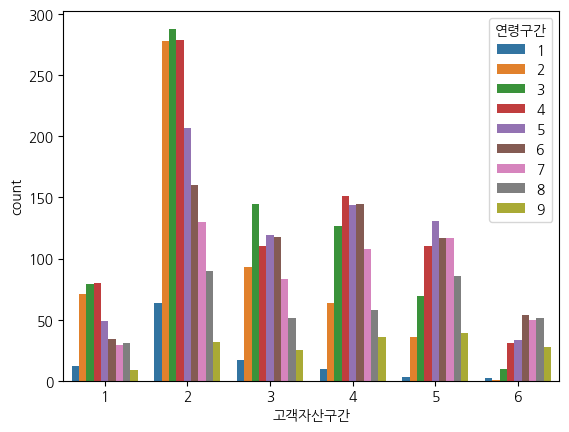

In [155]:
sns.countplot(x='고객자산구간',data= df, hue='연령구간')

#비슷한 양상 보임 (대부분의 연령에서 고객자산구간이 2일 때 크게 많고 3부터 점점 줆)


<AxesSubplot:xlabel='고객등급', ylabel='count'>

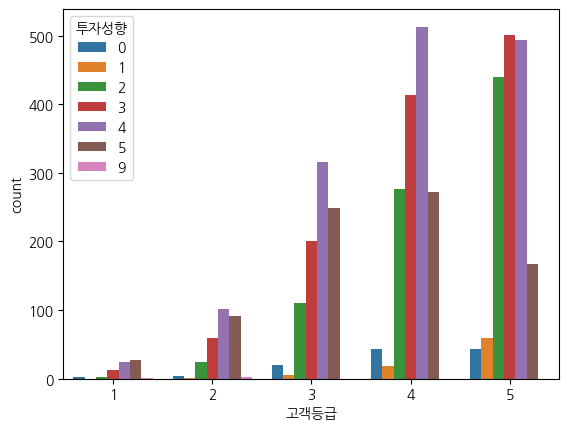

In [92]:
sns.countplot(x='고객등급',data= df, hue='투자성향')

#고객등급이 낮은 등급엔 적극/공격투자형이 제일 많음
#안정추구형의 등급별 개수가 

In [108]:
#고객등급별 투자성향 비율 확인
for i in df.고객등급.unique():
    print(df[df.고객등급==i].groupby(['고객등급', '투자성향'])['성별'].count()/df[df.고객등급==i].shape[0])

#고객등급 1 - 투자성향 5>4>>3
#고객등급 2 - 투자성향 4>5>>3
#고객등급 3 - 투자성향 4>5>3>2
#고객등급 4 - 투자성향 4>3>2>=5
#고객등급 5 - 투자성향 3>=4>2

#등급 낮은쪽엔 공격,적극투자형 많음 
#높을수록 적극~안정형 (공격성 낮아짐)

고객등급  투자성향
2     0       0.014085
      1       0.003521
      2       0.084507
      3       0.211268
      4       0.359155
      5       0.320423
      9       0.007042
Name: 성별, dtype: float64
고객등급  투자성향
5     0       0.025822
      1       0.034624
      2       0.257629
      3       0.294014
      4       0.289906
      5       0.098005
Name: 성별, dtype: float64
고객등급  투자성향
3     0       0.022222
      1       0.005556
      2       0.122222
      3       0.222222
      4       0.351111
      5       0.276667
Name: 성별, dtype: float64
고객등급  투자성향
4     0       0.027995
      1       0.012370
      2       0.179688
      3       0.268880
      4       0.333984
      5       0.177083
Name: 성별, dtype: float64
고객등급  투자성향
1     0       0.042857
      2       0.028571
      3       0.171429
      4       0.342857
      5       0.400000
      9       0.014286
Name: 성별, dtype: float64


<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

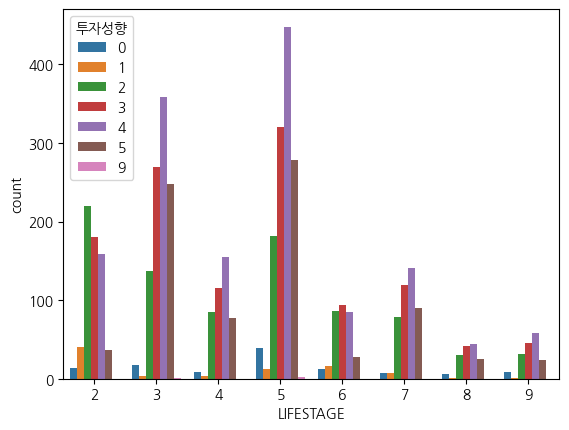

In [160]:
sns.countplot(x='LIFESTAGE',data= df, hue='투자성향')

#사회초년생 - 안정~위험중립
#가족형성기 남자 - 적극투자>위험중립=공격투자  
#가족형성기 여자 - 적극투자>위험중립=공격투자 
#가족성숙기 직장인(남) - 적극투자>위험중립>공격투자 (가족형성기때와 달라지지 않음)
#가족성숙기 주부(녀) - 위험중립>안정추구=공격투자 (위험성 제거함)
#가족성숙기 기타(남) - 적극투자>위험중립>공격투자 (가족형성기때와 달라지지 않음)
#가족성숙기 기타(녀) - 적극투자>=위험중립>공격투자 
#은퇴기 - 적극투자>위험중립>공격투자 

#성별이 남자인 집단은 가족형성기, 성숙기에 위험성 있는 투자 (적극, 공격투자)를 선호함
#성별이 여자인 집단은 주부인 집단이 아닌 집단보다 위험성 적음 

<AxesSubplot:xlabel='고객자산구간', ylabel='count'>

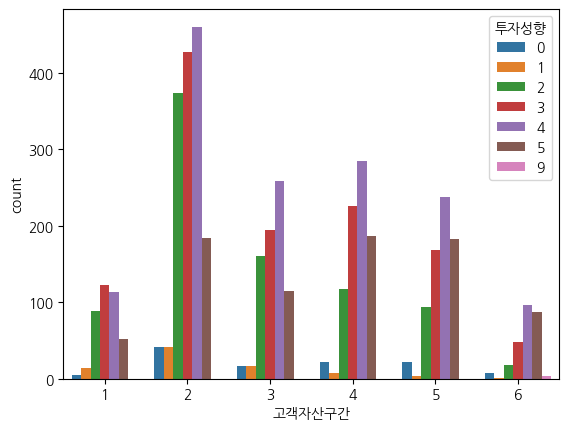

In [166]:
sns.countplot(x='고객자산구간',data= df, hue='투자성향')

#자산구간이 높은 집단에서 공격적 투자성향 보임

<AxesSubplot:xlabel='총투자기간', ylabel='count'>

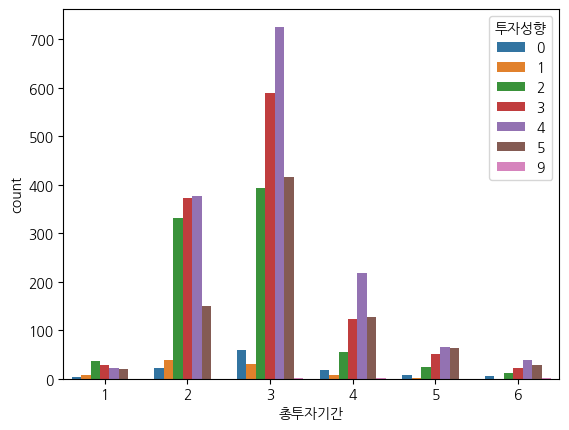

In [161]:
sns.countplot(x='총투자기간',data= df, hue='고객등급')

#모든 등급에서 투자기간이 3(1년-3년미만)인 고객이 가장 많고 1등급을 제외한 나머지 고객등급에서 그 이후로 급격히 떨어짐
#2~4등급 고객의 투자기간을 늘리기 위한 대책 마련이 필요해보임
#특히 

<AxesSubplot:xlabel='고객등급', ylabel='count'>

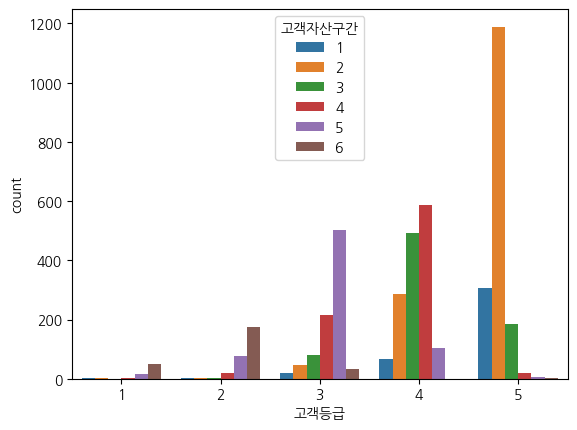

In [120]:
sns.countplot(x='고객등급',data= df, hue='고객자산구간')

#당연히 고객자산구간이 높을수록 등급 높을 줄. 아니었음
#

<AxesSubplot:xlabel='주거래상품군', ylabel='count'>

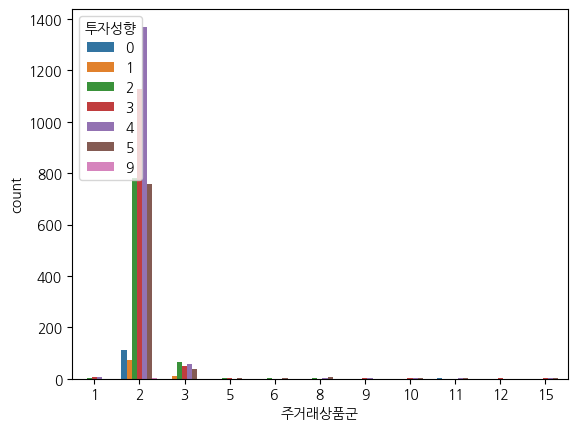

In [121]:
sns.countplot(x='주거래상품군',data= df, hue='투자성향')

#대부분 국내주식에 몰려있고 그나마 해외주식이 두번째 

In [124]:
#클러스터링에 쓸 컬럼만 뽑기
df_sp=df[['연령구간','투자성향', '고객등급', '총투자기간']]

In [125]:
df_sp.head()

,연령구간,투자성향,고객등급,총투자기간
1,6,4,2,6
2,7,4,5,6
3,6,4,3,6
4,5,2,5,5
5,5,3,4,6


In [126]:
for i in df_sp.columns:
    print(i,'컬럼의 분포 상태')
    print(df_sp[i].value_counts())
    print('--------------------------------\n')

연령구간 컬럼의 분포 상태
4    761
3    718
5    683
6    628
2    543
7    517
8    367
9    169
1    108
Name: 연령구간, dtype: int64
--------------------------------

투자성향 컬럼의 분포 상태
4    1449
3    1186
2     851
5     807
0     114
1      84
9       3
Name: 투자성향, dtype: int64
--------------------------------

고객등급 컬럼의 분포 상태
5    1704
4    1536
3     900
2     284
1      70
Name: 고객등급, dtype: int64
--------------------------------

총투자기간 컬럼의 분포 상태
3    2218
2    1291
4     549
5     211
1     118
6     107
Name: 총투자기간, dtype: int64
--------------------------------



In [127]:
# 컬럼 중 미정의 값들 제거
df_sp=df_sp[(df_sp['투자성향']!=99)&((df_sp['고객등급']!=9)&(df_sp['고객등급']!=99))]

In [128]:
for i in df_sp.columns:
    print(i,'컬럼의 분포 상태')
    print(df_sp[i].value_counts())
    print('--------------------------------\n')

연령구간 컬럼의 분포 상태
4    761
3    718
5    683
6    628
2    543
7    517
8    367
9    169
1    108
Name: 연령구간, dtype: int64
--------------------------------

투자성향 컬럼의 분포 상태
4    1449
3    1186
2     851
5     807
0     114
1      84
9       3
Name: 투자성향, dtype: int64
--------------------------------

고객등급 컬럼의 분포 상태
5    1704
4    1536
3     900
2     284
1      70
Name: 고객등급, dtype: int64
--------------------------------

총투자기간 컬럼의 분포 상태
3    2218
2    1291
4     549
5     211
1     118
6     107
Name: 총투자기간, dtype: int64
--------------------------------



In [129]:
df_sp.describe()

,연령구간,투자성향,고객등급,총투자기간
count,4494.000000,4494.000000,4494.000000,4494.000000
mean,4.817757,3.382733,4.005785,2.947708
std,2.045648,1.187862,0.986200,0.956046
min,1.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,4.000000,4.000000,3.000000
75%,6.000000,4.000000,5.000000,3.000000
max,9.000000,9.000000,5.000000,6.000000


In [130]:
# 컬럼마다 간격 다르기 때문에 스케일링 진행
# robust스케일링 할거다

from sklearn.preprocessing import RobustScaler

RB=RobustScaler()
df_sp_rb=RB.fit_transform(df_sp)

In [131]:
df_sp_rb=pd.DataFrame(df_sp_rb, columns=df_sp.columns)

In [132]:
df_sp_rb

,연령구간,투자성향,고객등급,총투자기간
0,0.333333,0.0,-1.0,3.0
1,0.666667,0.0,0.5,3.0
2,0.333333,0.0,-0.5,3.0
3,0.000000,-2.0,0.5,2.0
4,0.000000,-1.0,0.0,3.0
...,...,...,...,...
4489,-0.666667,1.0,0.5,-2.0
4490,0.333333,-3.0,0.5,-1.0
4491,1.333333,0.0,0.5,-1.0
4492,0.666667,0.0,0.5,-1.0


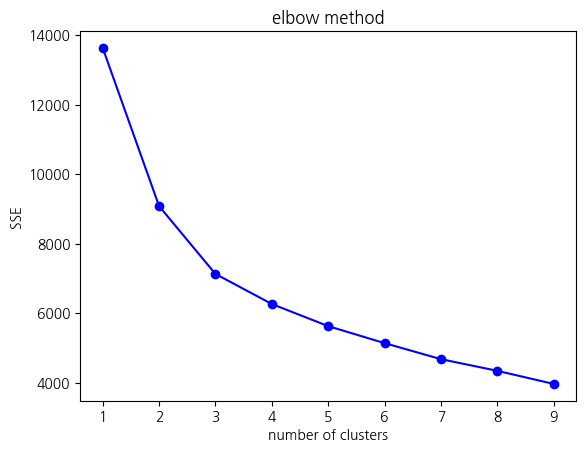

In [133]:
from sklearn.cluster import KMeans

def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df_sp_rb)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(df_sp_rb,10 )

In [134]:
# 엘보우 기법에 따라 k=3 결정
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_sp_rb)
df_sp_rb['cluster']=kmeans.labels_

In [135]:
df_sp_rb['cluster']=kmeans.labels_

In [136]:
df_sp_rb

,연령구간,투자성향,고객등급,총투자기간,cluster
0,0.333333,0.0,-1.0,3.0,2
1,0.666667,0.0,0.5,3.0,2
2,0.333333,0.0,-0.5,3.0,2
3,0.000000,-2.0,0.5,2.0,2
4,0.000000,-1.0,0.0,3.0,2
...,...,...,...,...,...
4489,-0.666667,1.0,0.5,-2.0,1
4490,0.333333,-3.0,0.5,-1.0,0
4491,1.333333,0.0,0.5,-1.0,1
4492,0.666667,0.0,0.5,-1.0,1


In [137]:
df_sp['cluster']=kmeans.labels_

In [138]:
df_sp

,연령구간,투자성향,고객등급,총투자기간,cluster
1,6,4,2,6,2
2,7,4,5,6,2
3,6,4,3,6,2
4,5,2,5,5,2
5,5,3,4,6,2
...,...,...,...,...,...
9980,3,5,5,1,1
9993,6,1,5,2,0
9995,9,4,5,2,1
9997,7,4,5,2,1


In [139]:
df_1=df[(df['투자성향']!=99)&((df['고객등급']!=9)&(df['고객등급']!=99))]

In [140]:
df_1['cluster']=kmeans.labels_

In [266]:
df_1

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분,cluster
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1,0
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9,0
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16,0
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16,0
5,5,4f330270cd37d758fbe9dfe45e0c40ed4579ab6b87a648...,1,5,3,4,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9980,aae67ac5ae3cafeb9904705cc970584731e31a4c24c56f...,1,3,5,1,2,3,5,1,5,2
9993,9993,6d1dde7a559a771e6f88990cd697564226fa89ecffa728...,1,6,1,1,2,7,5,2,10,1
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16,2
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16,2


In [273]:
df_sp.groupby(['cluster']).count()

#군집 별 고객이 1,2,0 순으로 많지만 1,2 규모가 압도적으로 크다

,연령구간,투자성향,고객등급,총투자기간
cluster,,,,
0,774,774,774,774
1,2005,2005,2005,2005
2,1715,1715,1715,1715


In [142]:
df_sp.groupby(['연령구간','cluster']).count()

투자성향  고객등급  총투자기간
연령구간 cluster                   
1    0          78    78     78
     1          26    26     26
     2           4     4      4
2    0         362   362    362
     1         160   160    160
     2          21    21     21
3    0         319   319    319
     1         320   320    320
     2          79    79     79
4    0         267   267    267
     1         335   335    335
     2         159   159    159
5    0         265   265    265
     1         294   294    294
     2         124   124    124
6    0         255   255    255
     1         250   250    250
     2         123   123    123
7    0         232   232    232
     1         164   164    164
     2         121   121    121
8    0         156   156    156
     1         113   113    113
     2          98    98     98
9    0          71    71     71
     1          53    53     53
     2          45    45     45

- 연령구간 : (낮을수록 이탈 가설) -> 0-2-1 순
- 투자성향 : (높을수록 이탈 가설) -> 2-0-1 순
- 고객등급 : (낮을수록 이탈 가설) -> 0-2-1 순
- 총투자기간 : (낮을수록 이탈 가설) ->  0-2-1 순

#### 클러스터 별 특징과 마케팅 전략 (1>2>0)
- 클러스터 0 : 연령구간 높고 투자성향 중상 (적극투자), 고객등급 상, 총투자기간 상  

    1 ) 연령구간이 제일 높아 중장년~고령층으로 예상됨
    
    2 ) 고객등급이 높고 투자기간도 긴 주요 고객층
    
    3 ) 이탈 가능성이 적다고 볼 수 있음. 적극적 상품 홍보 필요


- 클러스터 1 : 연령구간 낮고 투자성향 하(안정추구 - 위험중립) 고객등급 하 총투자기간 하

    １）연령대가 제일 낮고 투자기간이 짧음 (이탈 가능성 농후함)
        
    -> 최근 은행사에서 젊은층을 겨냥한 프로모션 경쟁이 치열하기 때문에 이를 대비한 상품 개발 필요함
    
    ２）투자성향이 공격적이지 않음. 이들에게 안정성이 보장된 고금리 장기 상품 추천시 긍정적 효과 예상됨
        

- 클러스터 2 : 연령구간 중간 투자성향 상 (적극 - 공격) 고객등급 중하 총투자기간 중하

    1 ) 투자성향이 타 군집에 비해 공격적. 주식 붐으로 유입된 군집으로 추정할 수 있음
    
    2 ) 유동성이 큰 시장에서 선물옵션 추천이 도움이 될 것이라 예상됨
    
    3 ) 특히 빠르게 돌아가는 금융시장에 관심이 많기에 앱 푸시알림으로 시장 정보 알림 기능으로 끌어들일 수 있음



*예상보다 군집형성에 연령구간이 뚜렷한 차이가 있지 않았음*

In [274]:
#군집화 시각화 확인

from sklearn.decomposition import PCA
X = df_sp_rb[['연령구간','투자성향','고객등급','총투자기간']]

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 1.73792054,  2.71202373],
       [ 1.56099772,  2.62929762],
       [ 1.66808537,  2.65372297],
       ...,
       [ 0.33584054, -0.73031902],
       [ 0.27067515, -0.91467135],
       [-2.37874927,  3.18168306]])

In [271]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = kmeans.labels_
pca_df.head()

,0,1,cluster
0,1.737921,2.712024,0
1,1.560998,2.629298,0
2,1.668085,2.653723,0
3,-0.688875,2.265929,0
4,0.634604,2.856734,0


C:\Users\gram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


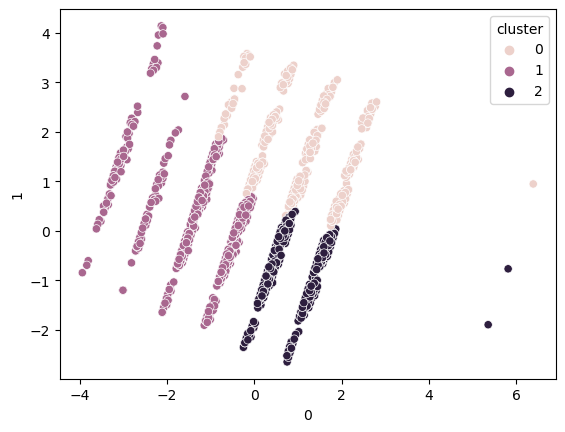

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

#값이 겹치지 않고 잘 구분되고 있음을 알 수 있다!